Freddie Mac mortgage history, 1999 - 2017. 
Business question: Will the lean holder default?
Strategy: Build GLM, Random Forest and Gradient Boosting ML models

In [19]:
#Import libraries and start cluster
import h2o
import matplotlib as plt
%matplotlib inline

from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator

import h2o.grid
from h2o.grid.grid_search import H2OGridSearch

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.261-b12, mixed mode, sharing)
  Starting server from C:\Users\Renzo\AppData\Local\Programs\Python\Python38-32\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Renzo\AppData\Local\Temp\tmp28ptbiwu
  JVM stdout: C:\Users\Renzo\AppData\Local\Temp\tmp28ptbiwu\h2o_Renzo_started_from_python.out
  JVM stderr: C:\Users\Renzo\AppData\Local\Temp\tmp28ptbiwu\h2o_Renzo_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/Denver
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.2
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_Renzo_8j2ehg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,247.5 Mb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [20]:
#Load data into cluster
filename = "https://s3.amazonaws.com/data.h2o.ai/DAI-Tutorials/loan_level_500k.csv"
loan_level = h2o.import_file(filename)



Parse progress: |█████████████████████████████████████████████████████████| 100%


In [21]:
loan_level.describe()
loan_level["DELINQUENT"].table()


Rows:500137
Cols:27




,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,CHANNEL,PREPAYMENT_PENALTY_MORTGAGE_FLAG,PRODUCT_TYPE,PROPERTY_STATE,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
type,int,int,enum,int,int,int,int,enum,int,int,int,int,real,enum,enum,enum,enum,enum,int,string,enum,int,int,enum,enum,enum,enum
mins,300.0,199901.0,,202402.0,10180.0,0.0,1.0,,6.0,1.0,8000.0,6.0,4.625,,,,,,600.0,NaN,,301.0,1.0,,,,
mean,712.5362124215463,200025.43095191894,,203023.19587233104,30777.82473929505,7.744531707523449,1.0288902574110141,,76.0535707144628,32.917540518705366,136493.48478516893,75.71071405720134,7.18268686379932,,,,,,55490.85713828671,NaN,,359.85546960132933,1.6302946648262617,,,,
maxs,839.0,201103.0,,204101.0,49740.0,55.0,4.0,,180.0,65.0,578000.0,100.0,11.5,,,,,,99900.0,NaN,,362.0,2.0,,,,
sigma,54.79126197408829,109.81554141516152,,110.3841885573338,11333.401144164458,12.046545969492563,0.21839057355939084,,15.1399860485127,11.111799994455243,60968.74306564565,14.937717088968684,0.5799408623980559,,,,,,29505.382258803038,NaN,,1.908250710418729,0.4827253530403165,,,,
zeros,0,0,,0,0,309979,0,,0,0,0,0,0,,,,,,0,0,,0,0,,,,
missing,2711,0,0,0,70149,51048,3,0,13,14929,0,9,0,0,0,0,0,0,31,0,0,0,247,0,0,0,0
0,669.0,200206.0,N,202901.0,nan,0.0,1.0,O,80.0,33.0,162000.0,80.0,7.12,R,N,FRM,WV,SF,26100.0,F199Q1000004,P,320.0,2.0,Other sellers,Other servicers,TRUE,FALSE
1,732.0,199904.0,N,202903.0,17140.0,0.0,1.0,O,25.0,10.0,53000.0,25.0,6.5,R,N,FRM,OH,SF,45200.0,F199Q1000005,N,360.0,1.0,Other sellers,Other servicers,TRUE,FALSE
2,679.0,200208.0,N,202902.0,15940.0,30.0,1.0,O,91.0,48.0,133000.0,91.0,6.75,R,N,FRM,OH,SF,44700.0,F199Q1000007,P,319.0,1.0,Other sellers,Other servicers,TRUE,FALSE


DELINQUENT,Count
FALSE,482146
TRUE,17991


In [22]:
#Feature engineering and data viz skipped

# Split the data set
train, valid, test = loan_level.split_frame(ratios=[0.7, 0.15], seed = 42)
print("train:%d valid:%d test:%d" % (train.nrows, valid.nrows, test.nrows))

train:350268 valid:74971 test:74898


In [23]:
#Response column
y = "DELINQUENT"
ignore = ["DELINQUENT", "PREPAID", "PREPAYMENT_PENALTY_MORTGAGE_FLAG", "PRODUCT_TYPE"]

x = list(set(train.names) - set(ignore))

Build a GLM

In [24]:
#Building a GLM
glm = H2OGeneralizedLinearEstimator(family = "binomial",
                                    seed = 42,
                                    model_id = "default_glm")

%time glm.train(x = x, y = y, training_frame = train, validation_frame = valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%
Wall time: 1.66 s


In [7]:
glm
glm.plot(metric = "negative_log_likelihood")
glm.varimp_plot()
glm.accuracy()

AttributeError: type object 'ModelBase' has no attribute 'plot'

In [25]:
glm.predict(valid).head(10)
default_glm_perf = glm.model_performance(valid)
print(default_glm_perf.auc())



glm prediction progress: |████████████████████████████████████████████████| 100%
0.8450514045844325


Build a Random Forest

In [26]:
rf = H2ORandomForestEstimator(seed = 42, model_id = "default_rf")
%time rf.train(x = x, y = y, training_frame = train, validation_frame = valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%
Wall time: 28 s


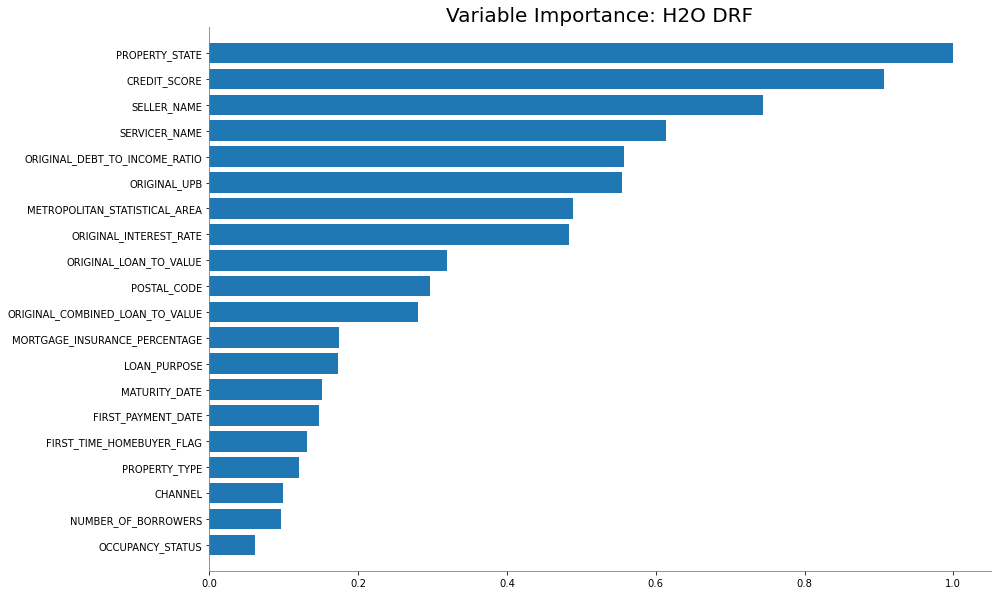

drf prediction progress: |████████████████████████████████████████████████| 100%


predict,FALSE,TRUE
FALSE,0.89606,0.10394
FALSE,0.989924,0.0100759
FALSE,0.99179,0.00820961
FALSE,0.994186,0.005814
FALSE,0.999108,0.00089201
TRUE,0.726028,0.273972
FALSE,0.999971,2.88916e-05
FALSE,0.999835,0.000164608
FALSE,0.847452,0.152548
FALSE,1,0


In [27]:
rf.varimp_plot(20)
rf.accuracy()
rf.F1()
rf.predict(valid)

In [28]:
default_rf_perf = rf.model_performance(valid)
print(default_rf_perf.auc())

0.826374425170771


Build a GBM

In [29]:
gbm = H2OGradientBoostingEstimator(seed = 42, model_id = "default_gbm")
%time gbm.train(x = x, y = y, training_frame = train, validation_frame = valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%
Wall time: 12.2 s


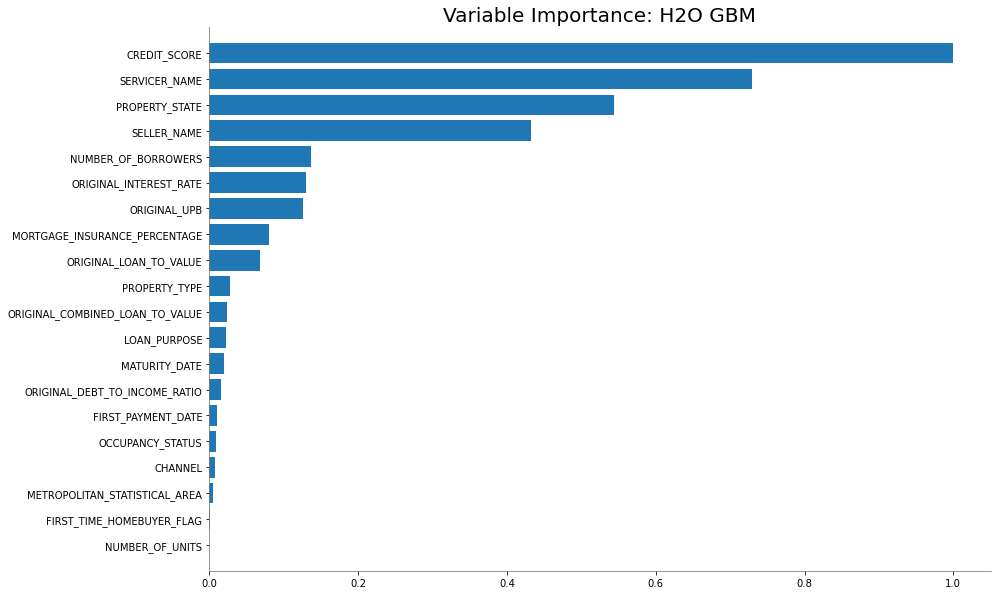

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,FALSE,TRUE
FALSE,0.978372,0.0216281
FALSE,0.995024,0.00497636
FALSE,0.964645,0.0353549
FALSE,0.99305,0.00694996
FALSE,0.99217,0.0078297
TRUE,0.591272,0.408728
FALSE,0.993899,0.00610064
FALSE,0.995599,0.00440117
FALSE,0.950489,0.0495107
FALSE,0.992925,0.00707464


In [30]:
gbm.logloss()
gbm.varimp_plot(20)
gbm.accuracy()
gbm.F1()
gbm.predict(valid)

In [31]:
default_gbm_perf = gbm.model_performance(valid)
print(default_gbm_perf.auc())

0.8542077452216156


 GLM Tuning with H2O Gridsearch

In [32]:
glm_grid = h2o.grid.H2OGridSearch(
    H2OGeneralizedLinearEstimator(
        family = "binomial",
        lambda_search = True),
    hyper_params = {
        "alpha": [x*0.01 for x in range(0,100)],
        "missing_values_handling": ["Skip","MeanImputation"]
    },

    grid_id = "glm_random_grid",

    search_criteria = {
        "strategy" : "RandomDiscrete",
        "max_models" : 300,
        "max_runtime_secs" : 300,
        "seed" : 42
    }
)

%time glm_grid.train(x = x, y = y, training_frame = train, validation_frame = valid)


glm Grid Build progress: |████████████████████████████████████████████████| 100%
Wall time: 5min 3s


In [33]:
sorted_glm_grid = glm_grid.get_grid(sort_by = "auc", decreasing = True)
sorted_glm_grid.sorted_metric_table()


Hyper-Parameter Search Summary: ordered by decreasing auc


,alpha,missing_values_handling,model_ids,auc
,[0.34],Skip,glm_random_grid_model_13,0.8534772
,[0.33],Skip,glm_random_grid_model_2,0.8534563
,[0.44],Skip,glm_random_grid_model_3,0.8534353
,[0.32],Skip,glm_random_grid_model_6,0.8534277
,[0.51],Skip,glm_random_grid_model_11,0.8533953
,[0.17],Skip,glm_random_grid_model_12,0.8533431
,[0.87],Skip,glm_random_grid_model_16,0.8533334
,[0.11],Skip,glm_random_grid_model_8,0.8533146
,[0.12],Skip,glm_random_grid_model_1,0.8532816
,[0.96],MeanImputation,glm_random_grid_model_15,0.8460859


In [41]:
tuned_glm = sorted_glm_grid.models[0]
tuned_glm.summary()
tuned_glm_perf = tuned_glm.model_performance(valid)
print("Default GLM AUC: %.4f \nTuned GLM AUC: %.4f" % (default_glm_perf.auc(), tuned_glm_perf.auc()))

Default GLM AUC: 0.8451 
Tuned GLM AUC: 0.8535


In [42]:
print ("Default GLM F1 Score:", default_glm_perf.F1())
print ("Tuned GLM F1 Score", tuned_glm_perf.F1())

Default GLM F1 Score:[[0.1260845507899052, 0.283510936623668]]
Tuned GLM F1 Score[[0.12600384543212745, 0.28270280444193485]]


In [43]:
print ("Default GLM: ", default_glm_perf.confusion_matrix())
print ("Tuned GLM: ",  tuned_glm_perf.confusion_matrix())

Default GLM:
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1260845507899052:


,FALSE,TRUE,Error,Rate
FALSE,68850.0,3463.0,0.0479,(3463.0/72313.0)
TRUE,1647.0,1011.0,0.6196,(1647.0/2658.0)
Total,70497.0,4474.0,0.0682,(5110.0/74971.0)



Tuned GLM:
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12600384543212745:


,FALSE,TRUE,Error,Rate
FALSE,51038.0,2634.0,0.0491,(2634.0/53672.0)
TRUE,1177.0,751.0,0.6105,(1177.0/1928.0)
Total,52215.0,3385.0,0.0685,(3811.0/55600.0)


Tune Random Forest model with H2O Grid Search

In [44]:
hyper_parameters = {
    "max_depth" : [1,3,5,6,7,8,9,10,12,13,15,20,25,35]
}

rf_opt = H2ORandomForestEstimator(
    seed = 42,
    stopping_rounds = 5,
    stopping_tolerance = 1e-4,
    stopping_metric = "auc",
    model_id = "rf"
)

grid_id = "depth_grid"

search_criteria = {"strategy" : "Cartesian"}

#Grid Search
rf_grid = H2OGridSearch(
    model = rf_opt,
    hyper_params = hyper_parameters,
    grid_id = grid_id,
    search_criteria = search_criteria    
)

%time rf_grid.train(x = x, y = y, training_frame = train, validation_frame = valid)


drf Grid Build progress: |████████

In [ ]:
sorted_rf_depth = rf_grid.get_grid(sort_by = "aud", decreasing = True)
sorted_rf_depth.sorted_metric_table()

h2o.cluster().shutdown(prompt = True)

In [ ]:
hyper_parameters2 = {
    "max_depth" : [8,9,10,11,12],
    "sample_rate" : [x/100. for x in range(20,101)]
}

rf_opt2 = H2ORandomForestEstimator(
    ntrees = 500,
    seed = 42,
    stopping_rounds = 5,
    stopping_tolerance = 1e-3,
    stopping_metric = "auc",
    model_id = "rf_grid"
)

grid_id = "rf_random_grid"

search_criteria = {
    "strategy" : "RandomDiscrete",
    "max_models" : 100,
    "max_runtime_secs" : 900,
    "seed" = 42
}

rf_grid2 = H2OGridSearch(
    model = rf_opt2,
    hyper_params = hyper_parameters2,
    grid_id = grid_id,
    search_criteria = search_criteria
)

%time rf_grid2.train(x = x, y = y, training_frame = train, validation_frame = valid)

In [ ]:
sorted_rf = rf_grid2.get_grid(sort_by = "auc", decreasing = True)
sorted_rf.sorted_metric_table()

tuned_rf = sorted_rf.models[0]
tuneed_rf_perf = tuned_rf.model_performance(valid)
tuned_rf_perf.auc()

Tune GBM model with H2O GridSearch

In [ ]:
hyper_params = {
    'max_depth' : [3,4,5,6,7,8,9,10,12,13,15]
    }

gbm = H2OGradientBoostingEstimator(
    model_id='grid_gbm',
    ntrees=50,
    seed=42
    )

gbm_grid = H2OGridSearch(
    gbm,
    hyper_params,
    grid_id = 'depth_gbm_grid',
    search_criteria = { 
        "strategy":"Cartesian"
        }
    )

%time gbm_grid.train(x = x, y = y, training_frame = train, validation_frame = valid)

In [ ]:
sorted_gbm_depth = gbm_grid.get_grid(sort_by = "auc", decreasing = True)
sorted_gbm_depth.sorted_metric_table()

In [ ]:
sorted_random_search = random_grid.get_grid(sort_by = "auc", decreasing = True)
sorted_random_search.sorted_metric_table()

In [ ]:
tuned_gbm_per = tuned_gbm.model_performance(valid)
print(tuned_gbm_per.auc())
print(tuned_gbm_per.F1())

In [ ]:
tuned_gbm_per.confusion_matrix()

In [ ]:
print("Default GBM AUC: %.4f \nTuned GBM AUC:%.4f" % (default_gbm_per.auc(), tuned_gbm_per.auc()))

Performances

In [ ]:
glm_test_per = tuned_glm.model_performance(test)
rf_test_per = tuned_rf.model_performance(test)
gbm_test_per = tuned_gbm.model_performance(test)

print("GLM Test AUC: %.4f \nRF Test AUC: %.4f \nGBM Test AUC: %.4f " % 
      (glm_test_per.auc(), rf_test_per.auc(), gbm_test_per.auc()))

print ("GLM Test F1 Score: ", glm_test_per.F1())
print ("RF Test F1 Score: ",  rf_test_per.F1())
print ("GBM Test F1 Score: ",  gbm_test_per.F1())

print ("GLM Confusion Matrix: ", glm_test_per.confusion_matrix())
print ("RF Confusion Matrix: ",  rf_test_per.confusion_matrix())
print ("GBM Confusion Matrix ",  gbm_test_per.confusion_matrix())